In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import time
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('..')
from field import read_data, read_csv, read_csv_BC, plot_overview, plot_PAH_ACSM

In [2]:
parent_path = '../../../' # How many folders do you have to go back before you are out of the P: drive?

# ACSM
path_vesterbrogade = 'L:/PG-Nanoteknologi/Data/ACSM/CSV data/EPA_Vesterbrogade_2023/' # Path to data located on L: drive
path_indiakaj = 'L:/PG-Nanoteknologi/Data/ACSM/CSV data/EPA_Indiakaj_2023/' # Path to data located on L: drive
path_greve = 'L:/PG-Nanoteknologi/Data/ACSM/CSV data/EPA_Greve_2023/' # Path to data located on L: drive

vesterbrogade = read_csv(path_vesterbrogade, parent_path)
indiakaj = read_data(path_indiakaj, parent_path)
greve = read_csv(path_greve, parent_path)

# Black carbon
## Important BC labels: 'Time local (hh:mm:ss)', 'Sample temp (C)', 'Sample RH (%)', 'UV BCc', 'Blue BCc', 'Green BCc', 'Red BCc', 'IR BCc'
path_BC_vesterbrogade = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Vesterbro_asphalt 2023/'
BC_station_vesterbrogade = ['MA200-0353']
path_BC_indiakaj = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Indiakaj_asphalt 2022/'
BC_station_indiakaj = ['S0052', 'S0055']
path_BC_greve = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Greve_asphalt_2023/'
BC_station_greve = ['MA200-0285']

BC_vesterbrogade = read_csv_BC(path_BC_vesterbrogade, parent_path, BC_station_vesterbrogade)
BC_indiakaj = read_csv_BC(path_BC_indiakaj, parent_path, BC_station_indiakaj)
BC_greve = read_csv_BC(path_BC_greve, parent_path, BC_station_greve)

print('Vesterbrogade: ', BC_vesterbrogade.keys())
print('Indiakaj: ', BC_indiakaj.keys())
print('Greve: ', BC_greve.keys())

Vesterbrogade:  dict_keys(['230612094700', '230613075200'])
Indiakaj:  dict_keys(['220713081200', '220814063001'])
Greve:  dict_keys(['230627070700', '230628065100'])


In [3]:
def plot_ACSM_BC(ax, df_ACSM, df_BC):
    ax.plot(df_ACSM.index, df_ACSM['Org_11000'], lw = 1, label = 'Org from ACSM', color = 'tab:blue')
    ax2 = ax.twinx()
    ax2.plot(df_BC.index, df_BC['IR BCc'], lw = 1, label = 'IR BCc from MA', color = 'tab:orange')

    formatter = FuncFormatter(lambda s, x: time.strftime('%H:%M', time.gmtime(s)))
    ax.xaxis.set_major_formatter(formatter)
    ax2.xaxis.set_major_formatter(formatter)

    ax.legend(frameon = False, fontsize = 8)
    ax2.legend(frameon = False, fontsize = 8)
    ax.set(ylabel = 'Intensity', xlabel = 'Time')
    ax2.set(ylabel = 'Mass concentration / $\mu$g/m$^{3}$')

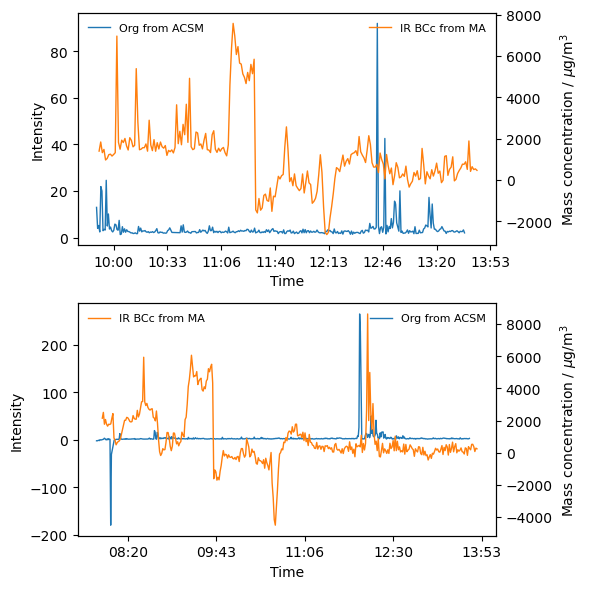

In [6]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_ACSM_BC(ax[0], vesterbrogade['EPA-vesterbrogade-120623'], BC_vesterbrogade['230612094700'])
plot_ACSM_BC(ax[1], vesterbrogade['EPA-vesterbrogade-130623'], BC_vesterbrogade['230613075200'][:-2])

fig.tight_layout()
fig.savefig('Field_data/vesterbrogade_ACSM_BC.png', dpi = 600)

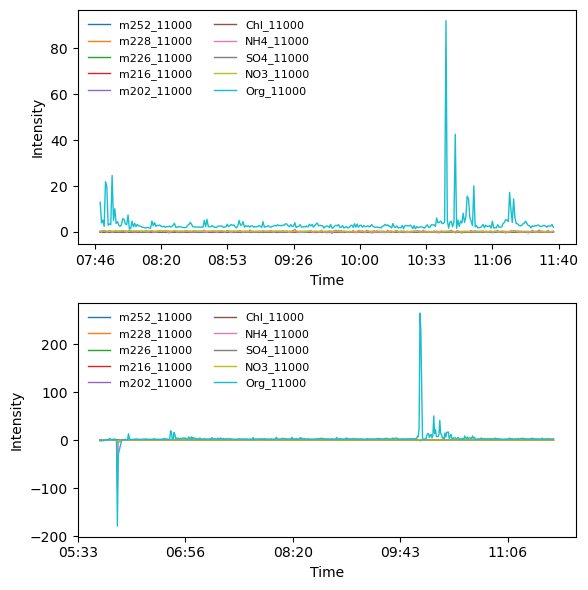

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_overview(ax[0], vesterbrogade['EPA-vesterbrogade-120623'], 2)
plot_overview(ax[1], vesterbrogade['EPA-vesterbrogade-130623'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_vesterbrogade.png', dpi = 600)

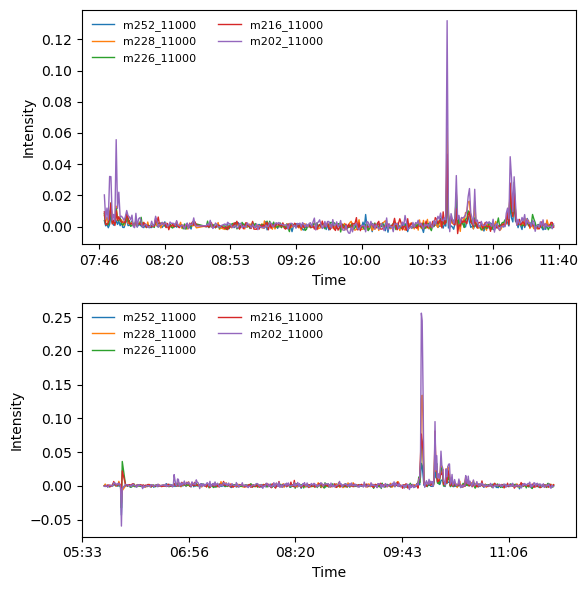

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_PAH_ACSM(ax[0], vesterbrogade['EPA-vesterbrogade-120623'], 2)
plot_PAH_ACSM(ax[1], vesterbrogade['EPA-vesterbrogade-130623'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_vesterbrogade_PAH.png', dpi = 600)

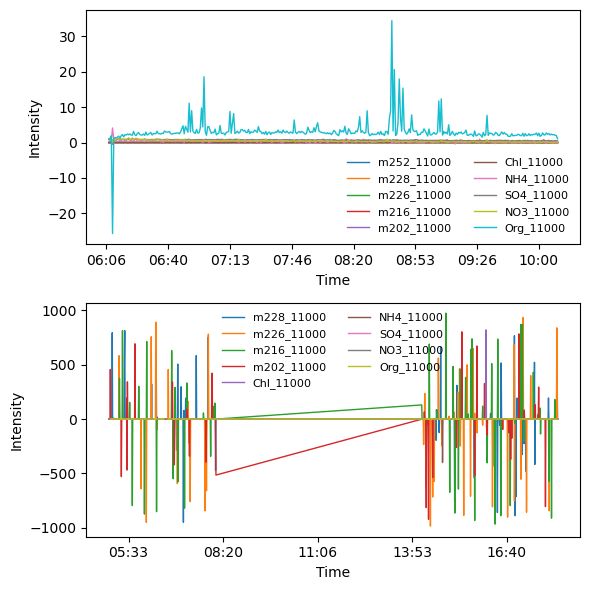

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_overview(ax[0], indiakaj['EPA-indiakaj-130722'], 2)
plot_overview(ax[1], indiakaj['EPA-indiakaj-140722'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_indiakaj.png', dpi = 600)

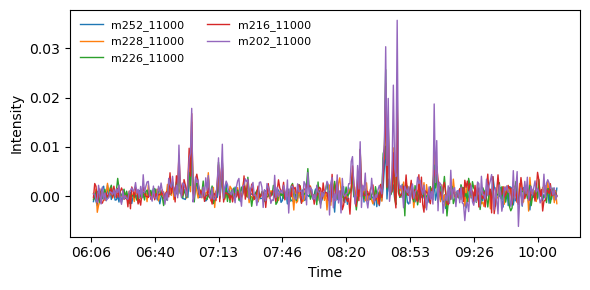

In [ ]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_PAH_ACSM(ax, indiakaj['EPA-indiakaj-130722'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_indiakaj_PAH.png', dpi = 600)

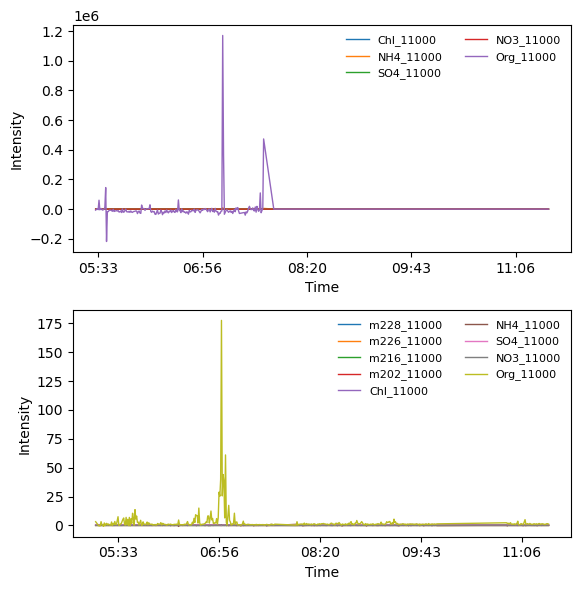

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_overview(ax[0], greve['EPA-greve-270623'], 2)
plot_overview(ax[1], greve['EPA-greve-280623'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_greve.png', dpi = 600)

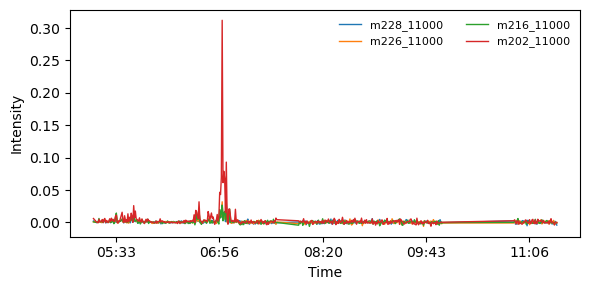

In [ ]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_PAH_ACSM(ax, greve['EPA-greve-280623'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_greve_PAH.png', dpi = 600)

C:\Users\B363580\AppData\Local\Temp\ipykernel_16524\3462980668.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  peak = peak[after_mask]


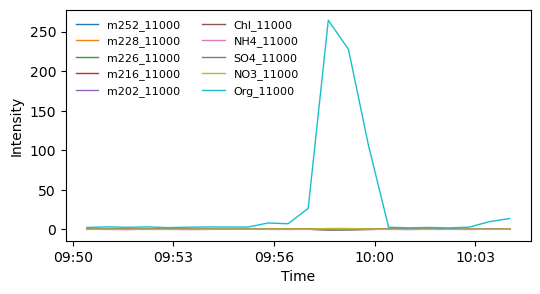

In [ ]:
before_mask = vesterbrogade['EPA-vesterbrogade-130623']['t_base'] > '6/13/2023 09:50:00'
after_mask = vesterbrogade['EPA-vesterbrogade-130623']['t_base'] < '6/13/2023 10:05:00'

peak = vesterbrogade['EPA-vesterbrogade-130623'][before_mask]
peak = peak[after_mask]

# Figure out how to flip dataframe to make a plot of intensity vs m/z value

fig, ax = plt.subplots(figsize = (6, 3))

plot_overview(ax, peak, 2)

fig.savefig('Field_data/EPA_vesterbrogade_130623_peak.png', dpi = 600)